# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.

In [1]:
#Problem 1

#Memorization method from Lect 3
def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] =  fib3(n-1, table) + fib3(n-2, table) 
        
    return table[n]

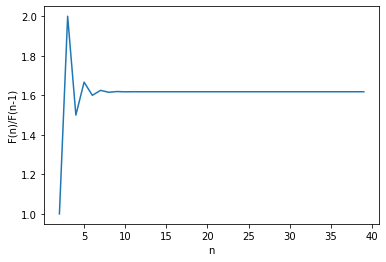

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(2, 40)  #array of n values
ratio = []            #empty array to hold F(n)/F(n-1) values

#I chose to leave the n values at n=40 so it's still clear to see what happens with the ratio close to 1 
# but it also goes long enough that you can see the ratio start to converge.

for i in n:
    table = [None]*(i+1)
    fn = fib3(i, table)    #calculate F(n)
    table = [None]*(i+1)
    fn1 = fib3(i-1, table) #calculate F(n-1)
    ratio = np.append(ratio, fn/fn1) #append ratio 

plt.plot(n, ratio)
plt.xlabel("n")
plt.ylabel("F(n)/F(n-1)")
plt.show()

In [38]:
#Problem 2

import numpy as np

#Recursion Method from Lecture 3
# Recursion method fib2, 
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

#Memorization method from Lect 3
def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] =  fib3(n-1, table) + fib3(n-2, table) 
        
    return table[n]

#Tabulation Method from Lecture 3
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
       
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    for i in range(2, n+1):
        table[i]=  table[i-1] + table[i-2]
        
    return table[n]

#Write to file
def writeFile(name, n, time):
    f = open(name, "w")
    for i in range(len(n)):
        f.write(str(n[i]))
        f.write("\t")
        f.write(str(time[i]))
        f.write("\n")
    f.close()
    return

#Read in n and time data files
def readFile(name):
    f = open(name, "r")
    n = []
    times = []
    for line in f:
        line = line.strip() 
        columns = line.split()
        n = np.append(n, float(columns[0]))
        times = np.append(times, float(columns[1]))
    return n, times



In [41]:
import time
n_r = [1, 5, 10, 50] #only doing these values so we're still uniform in log space but recursion will break if n>100
#n_r = [1, 5, 10]
times_r = []         #empty array to hold time values
for i in n_r:
    start_time = time.time()
    fib2(i)
    times_r = np.append(times_r, time.time() - start_time)
    
writeFile("recData.txt", n_r, times_r)

n_m = [1, 10, 100, 1000] #not sure if this will break for 10,000 -- it did
times_m = []         #empty array to hold time values
for i in n_m:
    table = [None]*(i+1)
    start_time = time.time()
    fib3(i, table)
    times_m = np.append(times_m, time.time() - start_time)

writeFile("memData.txt", n_m, times_m)

n_t = [1, 10, 100, 1000, 10000]
times_t = []         #empty array to hold time values
for i in n_t:
    start_time = time.time()
    fib4(i)
    times_t = np.append(times_t, time.time() - start_time)

writeFile("tabData.txt", n_t, times_t)

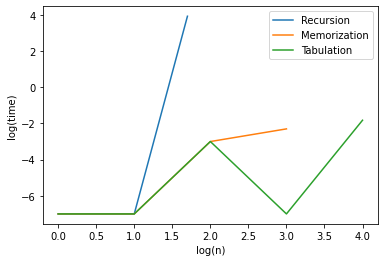

In [42]:
#Read in data files and plot log(time) vs log(n)
import matplotlib.pyplot as plt
import numpy as np

files = ["recData.txt", "memData.txt", "tabData.txt"]

plt.figure()
for i in files:
    this_n, this_time = readFile(i)
    for j in range(len(this_time)):
        if this_time[j] == 0.:
            this_time[j] = 0.0000001 #many of our times register as 0 which will throw an error when we try to take log
    plt.plot(np.log10(this_n), np.log10(this_time))
plt.xlabel("log(n)")
plt.ylabel("log(time)")
plt.legend(["Recursion", "Memorization", "Tabulation"])
plt.show()

The complexity of the recursion method can be represented by O(2^n) because the time this method requires increases exponentially. The complexity of the memorization method I think is more like O(log n) because it seems to be starting to flatten in how much time it takes relative to n. The complexity of the tabulation method is unlcear in this plot. I don't know what's happening with it.  